# Molten NaCl Example

In this walkthrough we will look at a system of molten NaCl to see how MDSuite can be used for the analysis of real systems

###  Library imports

For this specific tutorial we will use our designate data server zinchub to load the data. This is the only import other than mdsuite required for any analysis.

In [20]:
from zinchub import DataHub
import mdsuite as mds
from bokeh.plotting import show
import matplotlib.pyplot as plt
from mdsuite.calculators.einstein_diffusion_coefficients import EinsteinDiffusionCoefficients

With the following two lines we download the data from zinchub.

In [2]:
# NaCl = DataHub(url="https://github.com/zincware/DataHub/tree/main/NaCl_gk_i_q", tag="v0.1.0")
# NaCl.get_file(path=".")

### Starting your project

Now we can start an MDSuite project and add some data to it. Creating a project is as simple as calling the Project class with the name.

In [3]:
project = mds.Project("NaCl_Example")

2022-06-23 21:30:18,382 - INFO: Creating new project NaCl_Example


INFO - 2022-06-23 21:30:18,382 - project - Creating new project NaCl_Example
DEBUG - 2022-06-23 21:30:18,383 - database_base - Creating the database if it does not exist.


Now we can add an experiment to the project. In this case, we pass the downloaded data directly to this experiment rather than add it at a later stage.

In [4]:
project.add_experiment(
        name="NaCl_example_data",
        timestep=0.002,
        temperature=1400.0,
        units="metal",
        simulation_data="NaCl_gk_i_q.lammpstraj",
    )

DEBUG - 2022-06-23 21:30:18,432 - experiment_database - Got no database entries for number_of_configurations
DEBUG - 2022-06-23 21:30:18,448 - experiment_database - Got no database entries for units


2022-06-23 21:30:18,453 - INFO: Creating a new experiment!


INFO - 2022-06-23 21:30:18,453 - experiment - Creating a new experiment!
DEBUG - 2022-06-23 21:30:18,458 - experiment_database - Got no database entries for sample_rate
DEBUG - 2022-06-23 21:30:18,465 - experiment_database - Got no database entries for read_files
100%|███████████████████████████████████| 1/1 [00:04<00:00,  4.53s/it]
DEBUG - 2022-06-23 21:30:23,133 - experiment_database - Got no database entries for version
DEBUG - 2022-06-23 21:30:23,142 - experiment_database - Got no database entries for read_files


exp_NaCl_example_data

### System analysis

Now we can start looking at the system and learning from it. Let's start with a radial distribution function to see the structure.

In [5]:
# project.run.RadialDistributionFunction(number_of_configurations=100, plot=True)

This looks nice, but let's kick it up a notch and look at bond distributions with the angular distribution functions.

In [6]:
# project.execute_operation(my_calc)

In [7]:
my_calc = EinsteinDiffusionCoefficients(data_range=50)
data = project.experiments.NaCl_example_data.execute_operation(my_calc)

2022-06-23 21:30:23,168 - INFO: starting Einstein Diffusion Computation


INFO - 2022-06-23 21:30:23,168 - einstein_diffusion_coefficients - starting Einstein Diffusion Computation
DEBUG - 2022-06-23 21:30:23,176 - calculator_database - Getting data for NaCl_example_data, computation Einstein Self-Diffusion Coefficients with args StoredParameters(data_range=50, correlation_time=1, atom_selection=slice(None, None, None), tau_values=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), molecules=False, species=['Na', 'Cl'], fit_range=49)


2022-06-23 21:30:23,193 - INFO: Data not in database, performing computation.


INFO - 2022-06-23 21:30:23,193 - experiment - Data not in database, performing computation.
Applying transformation 'Unwrapped_Positions' to 'Na':   0%| | 0/1 [00DEBUG - 2022-06-23 21:30:23,319 - simulation_database - Expected str|Path but found <class 'bytes'>
Applying transformation 'Unwrapped_Positions' to 'Na': 100%|█| 1/1 [00
Applying transformation 'Unwrapped_Positions' to 'Cl':   0%| | 0/1 [00DEBUG - 2022-06-23 21:30:23,493 - simulation_database - Expected str|Path but found <class 'bytes'>
Applying transformation 'Unwrapped_Positions' to 'Cl': 100%|█| 1/1 [00
Na: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]
DEBUG - 2022-06-23 21:30:24,236 - experiment_database - Returning a dictionary for units
DEBUG - 2022-06-23 21:30:24,238 - experiment_database - Returning a dictionary for units
Cl: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]
DEBUG - 2022-06-23 21:30:24,931 - experiment_database - Returning a dictionary for units
DEBUG - 2022-06-2

In [25]:
data.data_dict["Na"].keys()

dict_keys(['diffusion_coefficient', 'uncertainty', 'gradient', 'intercept', 'time', 'msd', 'gradients', 'gradient_errors'])

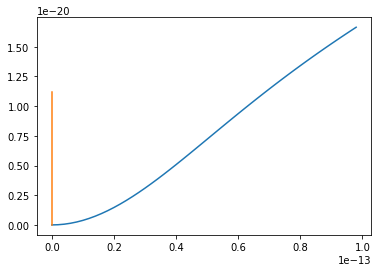

In [27]:
plt.plot(data.data_dict["Na"]["time"], data.data_dict["Na"]["msd"])
plt.plot(data.data_dict["Cl"]["time"], data.data_dict["Cl"]["msd"])

Finally, let's take a look at the Green-Kubo diffusion coefficients and ionic conductivity.

In [29]:
data.data_dict["Cl"]["time"]

[0.0,
 2e-27,
 4e-27,
 5.9999999999999995e-27,
 8e-27,
 1e-26,
 1.1999999999999999e-26,
 1.4e-26,
 1.6e-26,
 1.8e-26,
 2e-26,
 2.1999999999999998e-26,
 2.3999999999999998e-26,
 2.6e-26,
 2.8e-26,
 2.9999999999999995e-26,
 3.2e-26,
 3.4e-26,
 3.6e-26,
 3.7999999999999996e-26,
 4e-26,
 4.2e-26,
 4.3999999999999996e-26,
 4.5999999999999996e-26,
 4.7999999999999996e-26,
 5e-26,
 5.2e-26,
 5.4e-26,
 5.6e-26,
 5.800000000000001e-26,
 5.999999999999999e-26,
 6.2e-26,
 6.4e-26,
 6.6e-26,
 6.8e-26,
 7.000000000000001e-26,
 7.2e-26,
 7.4e-26,
 7.599999999999999e-26,
 7.8e-26,
 8e-26,
 8.2e-26,
 8.4e-26,
 8.6e-26,
 8.799999999999999e-26,
 9e-26,
 9.199999999999999e-26,
 9.4e-26,
 9.599999999999999e-26,
 9.8e-26]

In [11]:
# project.run.GreenKuboIonicConductivity(
#         data_range=300, plot=True, correlation_time=1
#     )